## Visualization
In this notebook, we will cover five visualizations and the hope is that each of them will reveal tips for you for your next plot. There is a wide range of visually pleasing plots you can generate with Julia and I strongly recommend envisioning what you want to plot beforehand and then figuring out how to accomplish it (most likely you will find all what you need in at least one julia plotting package). Here, we will be using the `Plots` package with a `gr()` backend

In [1]:
ENV["GKS_ENCODING"] = "utf-8"

"utf-8"

In [2]:
stateabbreviations = Dict("Alabama" => "AL",
    "Alaska" => "AK",
    "Arizona" => "AZ",
    "Arkansas" => "AR",
    "California" => "CA",
    "Colorado" => "CO",
    "Connecticut" => "CT",
    "Delaware" => "DE",
    "Florida" => "FL",
    "Georgia" => "GA",
    "Hawaii" => "HI",
    "Idaho" => "ID",
    "Illinois" => "IL",
    "Indiana" => "IN",
    "Iowa" => "IA",
    "Kansas" => "KS",
    "Kentucky" => "KY",
    "Louisiana" => "LA",
    "Maine" => "ME",
    "Maryland" => "MD",
    "Massachusetts" => "MA",
    "Michigan" => "MI",
    "Minnesota" => "MN",
    "Mississippi" => "MS",
    "Missouri" => "MO",
    "Montana" => "MT",
    "Nebraska" => "NE",
    "Nevada" => "NV",
    "New Hampshire" => "NH",
    "New Jersey" => "NJ",
    "New Mexico" => "NM",
    "New York" => "NY",
    "North Carolina" => "NC",
    "North Dakota" => "ND",
    "Ohio" => "OH",
    "Oklahoma" => "OK",
    "Oregon" => "OR",
    "Pennsylvania" => "PA",
    "Rhode Island" => "RI",
    "South Carolina" => "SC",
    "South Dakota" => "SD",
    "Tennessee" => "TN",
    "Texas" => "TX",
    "Utah" => "UT",
    "Vermont" => "VT",
    "Virginia" => "VA",
    "Washington" => "WA",
    "West Virginia" => "WV",
    "Wisconsin" => "WI",
    "Wyoming" => "WY", 
    "District of Columbia"=>"DC");

In [3]:
using Plots
using StatsPlots # this package provides stats specific plotting functions
gr()

Plots.GRBackend()

In [4]:
using Statistics
using StatsBase
using MLBase

Just a quick note about plotting with xlabels that are long and rotated. Currently, there seems to be an issue with using xticks labels that are rotated and long, like the plot I show next. As per this issue https://github.com/JuliaPlots/Plots.jl/issues/2107, this hasn't been fixed yet. But here, I create a quick function that will act as a "hack" to avoid this problem.

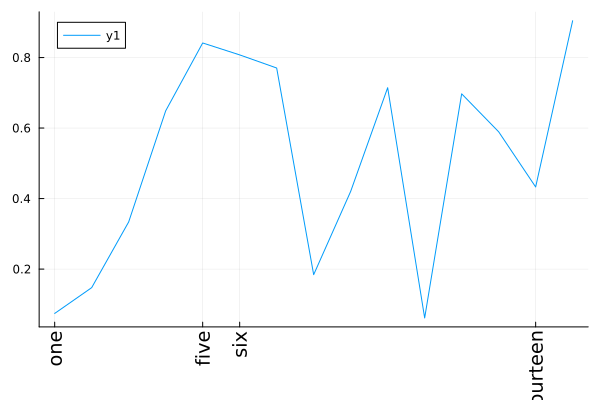

In [5]:
xtickslabels = ["one","five","six","fourteen"]
p = plot(rand(15),xticks = ([1,5,6,14],xtickslabels),xrotation=90,xtickfont=font(13))

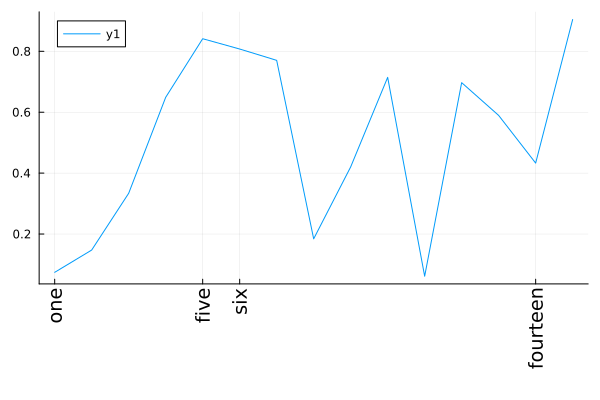

In [6]:
function pad_empty_plot(p)
    ep = plot(grid=false,legend=false,axis=false,framestyle = :box)#empty plot
    newplot = plot(p,ep,layout=@layout([a{0.99h};b{0.001h}]))
    return newplot
end
pad_empty_plot(p)

### Let us first get some data that we will use throughout this notebook

In [7]:
using XLSX
using DataFrames
D = DataFrame(XLSX.readtable("data/zillow_data_download_april2020.xlsx", "Sales_median_price_city")...);
dropmissing!(D)
states = D[:,:StateName];

MethodError: MethodError: no method matching iterate(::XLSX.DataTable)

Closest candidates are:
  iterate(!Matched::Base.AsyncGenerator, !Matched::Base.AsyncGeneratorState)
   @ Base asyncmap.jl:362
  iterate(!Matched::Base.AsyncGenerator)
   @ Base asyncmap.jl:362
  iterate(!Matched::EzXML.AttributeIterator)
   @ EzXML C:\Users\chadi\.julia\packages\EzXML\DL8na\src\node.jl:1467
  ...


In [8]:
states = D[:,:StateName];

UndefVarError: UndefVarError: `D` not defined

We will use these three states as examples throughtout this notebook, so we will create a `DataFrame` for each of them to have them ready when we need them.

In [9]:
NYids = findall(states.=="New York")
NYframe = dropmissing(D[NYids,:])
CAids = findall(states.=="California")
CAframe = dropmissing(D[CAids,:])
FLids = findall(states.=="Florida")
FLframe = dropmissing(D[FLids,:])

UndefVarError: UndefVarError: `states` not defined

### 🔴Plot 1: Symmetric violin plots and annotations
We will get started by just picking the most recent data we have about these states and plot their violin plots to see the distribution of house prices.

In [10]:
# pick a year: 2020-02
ca = CAframe[!,Symbol("2020-02")]
ny = NYframe[!,Symbol("2020-02")]
fl = FLframe[!,Symbol("2020-02")]

violin(["New York"], ny,legend=false,alpha=0.8)
violin!(["California"], ca,alpha=0.8)
violin!(["Florida"],fl,alpha=0.8)

UndefVarError: UndefVarError: `CAframe` not defined

One concept I learned from reading one of Edward Tufte's books is the idea of avoiding symmetry. Here, as you can see, each violin plot is symmetric. We can probably fit more information there by making use of each side of the violin plot. And indeed, we will now compare housing prices in these states from February 2020 with housing prices from 10 years before that (February 2010).

In [11]:
# 2020 data
ca = CAframe[!,Symbol("2020-02")]
ny = NYframe[!,Symbol("2020-02")]
fl = FLframe[!,Symbol("2020-02")]
violin(["New York"], ny,legend=false,alpha=0.8,side=:right)
violin!(["California"], ca,alpha=0.8,side=:right)
violin!(["Florida"],fl,alpha=0.8,side=:right)

### get the February 2010 data
ca10 = CAframe[!,Symbol("2010-02")]
ny10 = NYframe[!,Symbol("2010-02")]
fl10 = FLframe[!,Symbol("2010-02")]

violin!(["New York"], ny10,legend=false,alpha=0.8,side=:left)
violin!(["California"], ca10,alpha=0.8,side=:left)
violin!(["Florida"],fl10,alpha=0.8,side=:left)

UndefVarError: UndefVarError: `CAframe` not defined

This is really intersting... seems like the price distributions stayed very similar except that it shifted upwards after 10 years. Now let's make the plot more informative.

In [12]:
# No need for using many colors, let's just use one color for 2010, and one color for 2020

# pick a year: 2019-02
ca = CAframe[!,Symbol("2010-02")]
ny = NYframe[!,Symbol("2010-02")]
fl = FLframe[!,Symbol("2010-02")]
violin(["New York"], ny,alpha=0.8,side=:left,color=6,label="2010-02")
violin!(["California"], ca,alpha=0.8,side=:left,color=6,label="")
violin!(["Florida"],fl,alpha=0.8,side=:left,color=6,label="")

# pick a year: 2020-02
ca = CAframe[!,Symbol("2020-02")]
ny = NYframe[!,Symbol("2020-02")]
fl = FLframe[!,Symbol("2020-02")]
violin!(["New York"], ny,alpha=0.8,side=:right,color=7,label="2020-02")
violin!(["California"], ca,alpha=0.8,side=:right,color=7,label="")
violin!(["Florida"],fl,alpha=0.8,side=:right,color=7,label="")


UndefVarError: UndefVarError: `CAframe` not defined

Violin plots are cool in that they show a distribution of values. Nevertheless, one really intersting value in each violin plot is the median. We can very easily annotate this value on top of these violin plots.

In [13]:
# pick a year: 2019-02
ca = CAframe[!,Symbol("2010-02")]
ny = NYframe[!,Symbol("2010-02")]
fl = FLframe[!,Symbol("2010-02")]
violin(["New York"], ny,alpha=0.8,side=:left,color=6,label="2010-02")
violin!(["California"], ca,alpha=0.8,side=:left,color=6,label="")
violin!(["Florida"],fl,alpha=0.8,side=:left,color=6,label="")

# pick a year: 2020-02
ca = CAframe[!,Symbol("2020-02")]
ny = NYframe[!,Symbol("2020-02")]
fl = FLframe[!,Symbol("2020-02")]
violin!(["New York"], ny,alpha=0.8,side=:right,color=7,label="2020-02")
violin!(["California"], ca,alpha=0.8,side=:right,color=7,label="")
violin!(["Florida"],fl,alpha=0.8,side=:right,color=7,label="")


m = median(ny)
ep = 0.1
annotate!([(0.5+ep,m+0.05,text(m/1000,10,:left))])

m = median(ca)
ep = 0.1
annotate!([(1.5+ep,m+0.05,text(m/1000,10,:left))])

m = median(fl)
ep = 0.1
annotate!([(2.5+ep,m+0.05,text(m/1000,10,:left))])

plot!(xtickfont=font(10),size=(500,300))

UndefVarError: UndefVarError: `CAframe` not defined

Now let's put all of this together and add annotations on both sides.

In [14]:
# putting it together.

ep = 0.05 # will later be used in padding for annotations

# set up the plot
plot(xtickfont=font(10))

states_of_interest = ["New York", "California", "Florida", "Ohio","Idaho"]
years_of_interst = [Symbol("2010-02"),Symbol("2020-02")]

# year 1
xstart = 0.5
yi = years_of_interst[1]
for si in states_of_interest
    curids = findall(states.==si)
    curFrame = D[curids,:]
    curprices = curFrame[!,yi]
    m = median(curprices)
    annotate!([(xstart-ep,m+0.05,text(m/1000,8,:right))])
    xstart += 1
    violin!([si], curprices,alpha=0.8,side=:left,color=6,label="")
end
plot!(Shape([],[]),color=6,label=yi)

# year 2
xstart = 0.5
yi = years_of_interst[2]
for si in states_of_interest
    curids = findall(states.==si)
    curFrame = D[curids,:]
    curprices = curFrame[!,yi]
    m = median(curprices)
    annotate!([(xstart+ep,m+0.05,text(m/1000,8,:left))])
    xstart += 1
    violin!([si], curprices,alpha=0.8,side=:right,color=7,label="")
end
plot!(Shape([],[]),color=7,label=yi)
ylabel!("housing prices")

UndefVarError: UndefVarError: `states` not defined

### 🔴Plot 2: Bar charts, histograms, and insets
Now let's compare states based on the number of location entries they have in the data.

In [15]:
mapstates = labelmap(states)
stateids = labelencode(mapstates, states)
histogram(stateids,nbins=length(mapstates))

UndefVarError: UndefVarError: `states` not defined

There are a few problems with this histogram. First, unsorted histograms are often harder to read so the first thing we will do is rearrange this histogram. Next, we will add annotations to be able to map each bar to a state quickly.

In [16]:
# first we'll start with sorting
h = fit(Histogram, stateids,nbins=length(mapstates))
sortedids = sortperm(h.weights,rev=true)
bar(h.weights[sortedids],legend=false)

UndefVarError: UndefVarError: `mapstates` not defined

Next, we will arrange this plot horizontally (via the `orientation = :horizontal` argument) and add annotations.

In [17]:
bar(h.weights[sortedids],legend=false,orientation = :horizontal,yflip=true)

UndefVarError: UndefVarError: `h` not defined

In [18]:
# just an example of annotations
bar(h.weights[sortedids],legend=false,orientation = :horizontal,yflip=true,size=(400,500))
stateannotations = mapstates.vs[sortedids]
for i = 1:3
    annotate!([(h.weights[sortedids][i]-5,i,text(stateannotations[i],10,:left))])
end
plot!()

UndefVarError: UndefVarError: `h` not defined

Get rid of linewidth, and map the states to the two letters identifier.

In [19]:
bar(h.weights[sortedids],legend=false,orientation = :horizontal,yflip=true,linewidth=0,width=0,size=(400,500))
stateannotations = mapstates.vs[sortedids]
for i = 1:length(stateannotations)
    annotate!([(h.weights[sortedids][i]-5,i,text(stateabbreviations[stateannotations[i]],5,:left))])
end
plot!()

UndefVarError: UndefVarError: `h` not defined

Since we are using one color, use a more neutral color (gray), and use Edward Tufte's strategy in his book "The Visual Display of Quantitative Information" to add grid lines on top of the bar charts.

In [20]:
bar(h.weights[sortedids],legend=false,orientation = :horizontal,
        yflip=true,linewidth=0,width=0,color=:gray,alpha=0.8)
stateannotations = mapstates.vs[sortedids]
for i = 20:20:200
    plot!([i,i],[50,0],color=:white)
end
for i = 1:length(stateannotations)
    annotate!([(h.weights[sortedids][i]-5,i,text(stateabbreviations[stateannotations[i]],6,:left))])
end
plot!(grid=false,yaxis=false,xlim=(0,maximum(h.weights)),xticks = 0:20:200)
xlabel!("number of listings")

UndefVarError: UndefVarError: `h` not defined

Finally, we will fix sizes and add an inset figure to zoom in on the lower left corner.

In [21]:
bar(h.weights[sortedids],legend=false,orientation = :horizontal,
        yflip=true,linewidth=0,color=:gray,alpha=0.8,size=(300,500))
stateannotations = mapstates.vs[sortedids]
ht = length(h.weights)
for i = 20:20:200
    plot!([i,i],[ht,0],color=:white)
end
for i = 1:length(stateannotations)
    annotate!([(h.weights[sortedids][i]+2,i,text(stateabbreviations[stateannotations[i]],6,:left))])
end
plot!(grid=false,yaxis=false,xlim=(0,maximum(h.weights)+5),xticks = 0:20:200)
xlabel!("number of listings")

f = Plots.plot!(inset = bbox(0.7,0.15,0.25,0.6,:top,:left))
bar!(f[2],h.weights[sortedids][21:end],legend=false,orientation = :horizontal,
        yflip=true,linewidth=0,width=0,color=:gray,alpha=0.8)
for i = 21:length(stateannotations)
    annotate!(f[2],[(h.weights[sortedids][i]+1,i-20,text(stateabbreviations[stateannotations[i]],6,:left))])
end
plot!(f[2],[10,10],[20,0],color=:white,xticks=0:10:20,yaxis=false,grid=false,xlim=(0,20))
plot!()

UndefVarError: UndefVarError: `h` not defined

### 🔴Plot 3: Plots with error bars
Next, we will compar state prices over the years and see how they have changed. we will use error bars too.

In [22]:
M = Matrix(NYframe[:,5:end])

UndefVarError: UndefVarError: `NYframe` not defined

In [23]:
xtickslabels = string.(names(NYframe[!,5:end]))

UndefVarError: UndefVarError: `NYframe` not defined

We will first get started with plotting the price changes over time for each region.

In [24]:
plot()
for i = 1:size(M,1)
    plot!(M[i,:],legend=false)
end
plot!()
p = plot!(xticks = (1:4:length(xtickslabels),xtickslabels[1:4:end]),xrotation=90,xtickfont=font(8),grid=false)
pad_empty_plot(p)

UndefVarError: UndefVarError: `M` not defined

A plot like this isn't indicative of how the price trend is going overall for New York. What we will do next is for each time point, we will find the median value as well as the 80th and 20th percentile and plot these values. Let's write the precentile functin first.

In [25]:
function find_percentile(M, pct)
    r = zeros(size(M,2))
    for i = 1:size(M,2)
        v = M[:,i]
        len = length(v)
        ind = floor(Int64,pct*len)
        newarr = sort(v);
        r[i] = newarr[ind];
    end
    return r
end

md = find_percentile(M,0.5)
mx = find_percentile(M,0.8)
mn = find_percentile(M,0.2)
plot(md,ribbon =(md.-mn,mx.-md),color = :blue,label="NY",grid=false)
p = plot!(xticks = (1:4:length(xtickslabels),xtickslabels[1:4:end]),xrotation=90,xtickfont=font(8))
pad_empty_plot(p)

UndefVarError: UndefVarError: `M` not defined

Next, we will just put everything together in one function. note the `!` symbol at the end of the name -- this is because we will pass a plot canvas `plotid` as an argument, and this function will modify it.

In [26]:
function plot_individual_state!(plotid,statevalue,colorid)
    curids = findall(states.==statevalue)
    curFrame = D[curids,:]
    M = Matrix(curFrame[:,5:end])
    md = find_percentile(M,0.5)
    mx = find_percentile(M,0.8)
    mn = find_percentile(M,0.2)
    plot!(plotid,md,ribbon =(md.-mn,mx.-md),color = colorid,label=stateabbreviations[statevalue],grid=false)
    plot!(plotid,xticks = (1:4:length(xtickslabels),xtickslabels[1:4:end]),xrotation=90,xtickfont=font(8))
end

plot_individual_state! (generic function with 1 method)

In [27]:
plotid = plot()
plot_individual_state!(plotid,"Indiana",1)
plot_individual_state!(plotid,"Ohio",2)
plot_individual_state!(plotid,"Idaho",3)
# plot_individual_state!(plotid,"California",4)
ylabel!("prices")
pad_empty_plot(plotid)

UndefVarError: UndefVarError: `states` not defined

### 🔴Plot 4: Plots with double axes

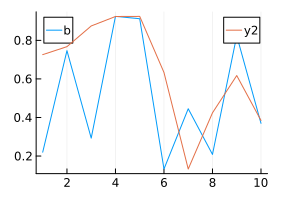

In [28]:
vector1 = rand(10)
vector2 = rand(10)*100
plot(vector1,label = "b",size=(300,200))
plot!(twinx(), vector2,color=2,axis=false)

In [29]:
xtickslabels = NYframe[!,:RegionName]

UndefVarError: UndefVarError: `NYframe` not defined

In [30]:
sz = NYframe[!,:SizeRank]
pc = NYframe[!,end]
M = Matrix(NYframe[:,5:end])
M = copy(M')
md = find_percentile(M,0.9)

md = find_percentile(M,0.5)
mx = find_percentile(M,0.9)
mn = find_percentile(M,0.1)
vector1 = sz

plot()
plot!(md,ribbon =(md.-mn,mx.-md),color = 1,grid=false,label="")

plot!(xticks = (1:length(xtickslabels),xtickslabels),xrotation=90,xtickfont=font(10))
plot!(twinx(), vector1,color=2,label="",ylabel="rank",grid=false,xticks=[],linewidth=2)
plot!(Shape([0], [0]),color=1,label="Prices (left)")
p = plot!([],[],color=2,label="Rank (right)")
ep = plot(grid=false,legend=false,axis=false,framestyle = :box)#empty plot
plot(p,ep,layout=@layout([a{0.85h};b{0.001h}]))

UndefVarError: UndefVarError: `NYframe` not defined

Interesting! Seems like in general, lower rank regions have higher price and vice versa.

### 🔴Plot 5: High-dimensional data in a 2D plot
We've seen a 3D plot in the Clustering notebook previously. I personally prefer 2D plots because they are often easier to read and is viewable in a print version more clearly. Here, we will explore how we can use color as a third dimension. Note that you can also use sizes as third dimension.

We will use the California data, and plot the prices from 2010-02 on the x-axis and 2020-02 on the y-axis. We will then color code each data point by its current rank.

Let's generate a quick scatter plot first.

In [31]:
CA202002 = CAframe[!,Symbol("2020-02")]
CA201002 = CAframe[!,Symbol("2010-02")]
scatter(CA201002,CA202002)

UndefVarError: UndefVarError: `CAframe` not defined

In [32]:
CA202002 = CAframe[!,Symbol("2020-02")]
CA201002 = CAframe[!,Symbol("2010-02")]
CAranks = CAframe[!,:SizeRank]
scatter(CA201002,CA202002,legend=false,markerstrokewidth=0,markersize=3,alpha=0.6,grid=false)

UndefVarError: UndefVarError: `CAframe` not defined

Then, to work with colors we will make use of the package `ColorSchemes`.

In [33]:
using ColorSchemes

In [34]:
# normalize the ranks to be between 0 and 1
continuousranks = CAranks./maximum(CAranks)

# create a placeholder vector that will store the color of each value
colorsvec = Vector{RGB{Float64}}(undef,length(continuousranks))

# and finally map the colors according to ColorSchemes.autumn1, there are many other schemes you can choose from
map(i->colorsvec[i]=get(ColorSchemes.autumn1,continuousranks[i]),1:length(colorsvec))

UndefVarError: UndefVarError: `CAranks` not defined

In [35]:
continuousdates = CAranks./maximum(CAranks)
colorsvec = Vector{RGB{Float64}}(undef,length(continuousdates))
map(i->colorsvec[i]=get(ColorSchemes.autumn1,continuousdates[i]),1:length(colorsvec))
scatter(CA201002,CA202002,color=colorsvec,
    legend=false,markerstrokewidth=0,markersize=3,grid=false)
xlabel!("2010-02 prices",xguidefontsize=10)
ylabel!("2020-02 prices",yguidefontsize=10)
p1 = plot!()

UndefVarError: UndefVarError: `CAranks` not defined

We have the colors, but we have no indication of what the color means. Next, we will create a new plot whose job will be to encode the ranks of these dots, and then we will pad the two plots together.

In [36]:
#set up the plot canvas
xvals = 0:100
s = Shape([0,1,1,0],[0,0,1,1])
plot(s,color=ColorSchemes.autumn1[1],grid=false,axis=false,
    legend=false,linewidth=0,linecolor=nothing)

for i = 2:101
    s = Shape([xvals[i],xvals[i]+1,xvals[i]+1,xvals[i]],[0,0,1,1])
    plot!(s,color=ColorSchemes.autumn1[i],grid=false,axis=false,
    legend=false,linewidth=0,linecolor=nothing)
end

mynormalizer = maximum(CAranks)
xtickslabels = 0:div(mynormalizer,10):mynormalizer
continuousdates = xtickslabels./mynormalizer
xticksloc = round.(Int,continuousdates.*101)

# annotate using the ranks
rotatedfont = font(10, "Helvetica",rotation=90)
for i = 1:length(xtickslabels)
    annotate!(xticksloc[i],0.5,text(xtickslabels[i], rotatedfont))
end
p2 = plot!()

UndefVarError: UndefVarError: `CAranks` not defined

And now pad together...

In [37]:
mylayout = @layout([a{0.89h};b{0.1h}])
plot(p1,p2,layout=mylayout)

UndefVarError: UndefVarError: `p1` not defined

This agrees with what we saw earlier with the data from New York. Lower rank regions seem to have higher prices.

# Finally...
After finishing this notebook, you should be able to:
- [ ] create violin plots in julia
- [ ] create bar charts
- [ ] add annotations to your plots
- [ ] create an inset figure for your plot
- [ ] create plots with error margin
- [ ] create plots with double axes
- [ ] create a new color mapping to a given set of values
- [ ] create two dimensional plots and use color to indicate a third dimension
- [ ] pad multiple plots together

# 🥳 One cool finding

Many interesting cool things here! The most interesting I found was that Idaho is following California's trend in housing prices, and Idaho's prices are growing faster than places like Indiana and Ohio.

<img src="data/1201.png" width="500">
<img src="data/1202.png" width="500">